In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration_4').getOrCreate()
import pandas as pd
ch = pd.read_csv("Epidemic data of China.csv")
df = spark.createDataFrame(ch)

In [2]:
print(ch.columns)
print(ch.shape)
print(ch.dtypes)

Index(['Province/State', 'Observation Date', 'Confirmed', 'Daily Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude', 'Country/Region'],
      dtype='object')
(1666, 9)
Province/State       object
Observation Date     object
Confirmed             int64
Daily Confirmed       int64
Deaths                int64
Recovered             int64
Latitude            float64
Longitude           float64
Country/Region       object
dtype: object


In [3]:
df.printSchema()


root
 |-- Province/State: string (nullable = true)
 |-- Observation Date: string (nullable = true)
 |-- Confirmed: long (nullable = true)
 |-- Daily Confirmed: long (nullable = true)
 |-- Deaths: long (nullable = true)
 |-- Recovered: long (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Country/Region: string (nullable = true)



In [4]:
df.na.drop().show()

+--------------+----------------+---------+---------------+------+---------+--------+---------+--------------+
|Province/State|Observation Date|Confirmed|Daily Confirmed|Deaths|Recovered|Latitude|Longitude|Country/Region|
+--------------+----------------+---------+---------------+------+---------+--------+---------+--------------+
|         Anhui|      22-01-2020|        1|              1|     0|        0|    32.0|    117.0|Mainland China|
|         Anhui|      23-01-2020|        9|              8|     0|        0|    32.0|    117.0|Mainland China|
|         Anhui|      24-01-2020|       15|              6|     0|        0|    32.0|    117.0|Mainland China|
|         Anhui|      25-01-2020|       39|             24|     0|        0|    32.0|    117.0|Mainland China|
|         Anhui|      26-01-2020|       60|             21|     0|        0|    32.0|    117.0|Mainland China|
|         Anhui|      27-01-2020|       70|             10|     0|        0|    32.0|    117.0|Mainland China|
|

In [5]:
df.count()

1666

In [6]:
df.na.drop().count()

1666

In [7]:

from matplotlib import pyplot as plt
import matplotlib as mpl

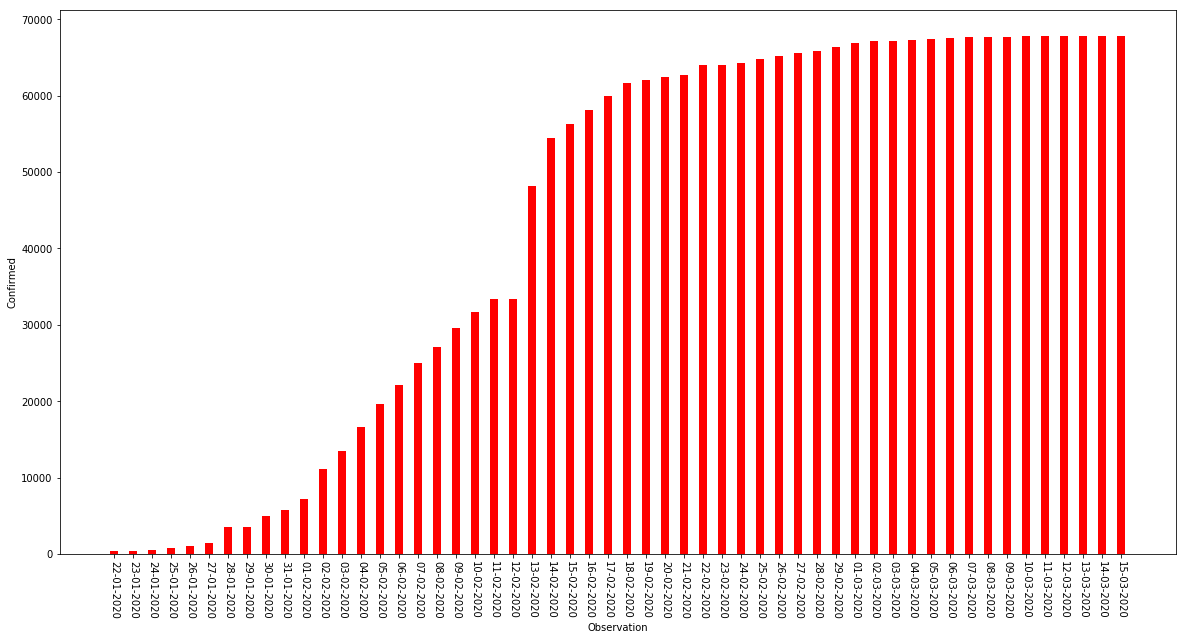

In [8]:
################ Confirmed/Observationn date
X=ch['Observation Date']
Y=ch['Confirmed']
plt.figure(figsize=(20,10))
plt.bar(X,Y,0.4,color="red")
plt.xlabel("Observation")
plt.ylabel("Confirmed")
plt.xticks(rotation=-90)
plt.show()

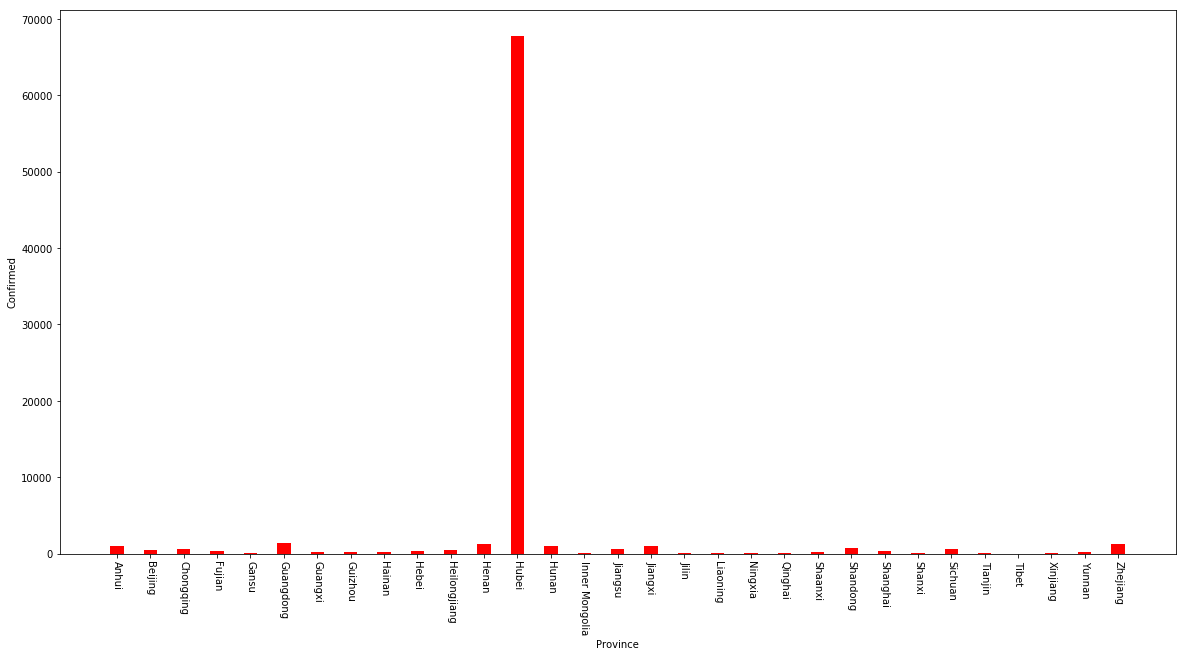

In [9]:
################ Confirmed/Province State
X=ch['Province/State']
Y=ch['Confirmed']
plt.figure(figsize=(20,10))
plt.bar(X,Y,0.4,color="red")
plt.xlabel("Province")
plt.ylabel("Confirmed")
plt.xticks(rotation=-90)
plt.show()

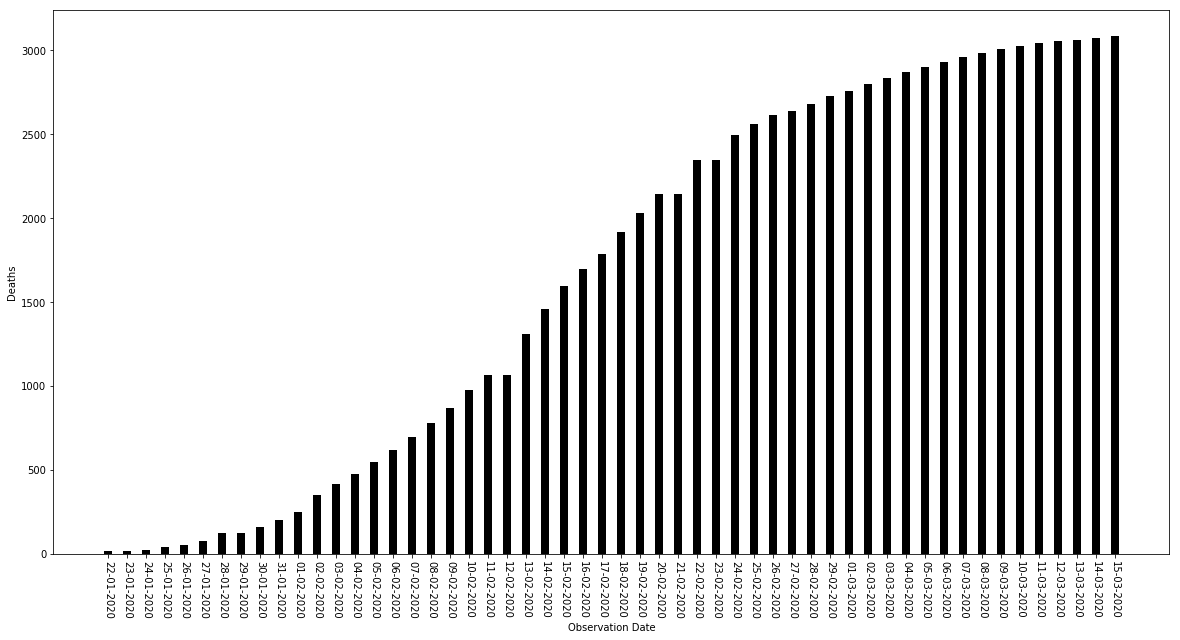

In [10]:
################ Deaths/Observation date
X=ch['Observation Date']
Y=ch['Deaths']
plt.figure(figsize=(20,10))
plt.bar(X,Y,0.4,color="black")
plt.xlabel("Observation Date")
plt.ylabel("Deaths")
plt.xticks(rotation=-90)
plt.show()

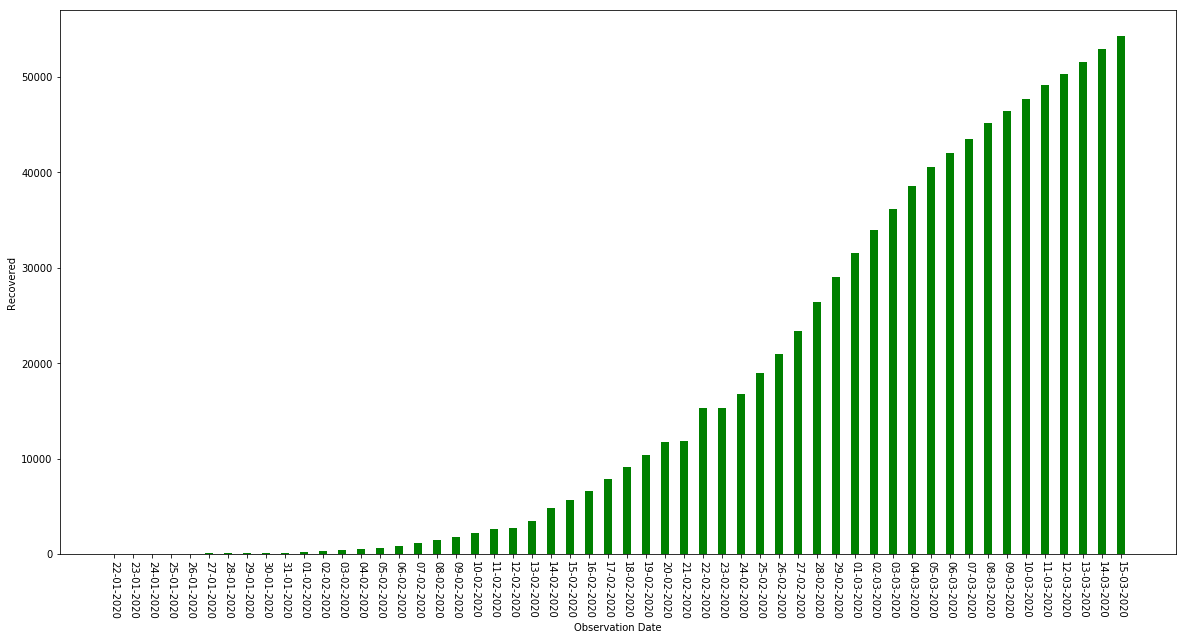

In [11]:
################ Recovered/Observation date
X=ch['Observation Date']
Y=ch['Recovered']
plt.figure(figsize=(20,10))
plt.bar(X,Y,0.4,color="green")
plt.xlabel("Observation Date")
plt.ylabel("Recovered")
plt.xticks(rotation=-90)
plt.show()

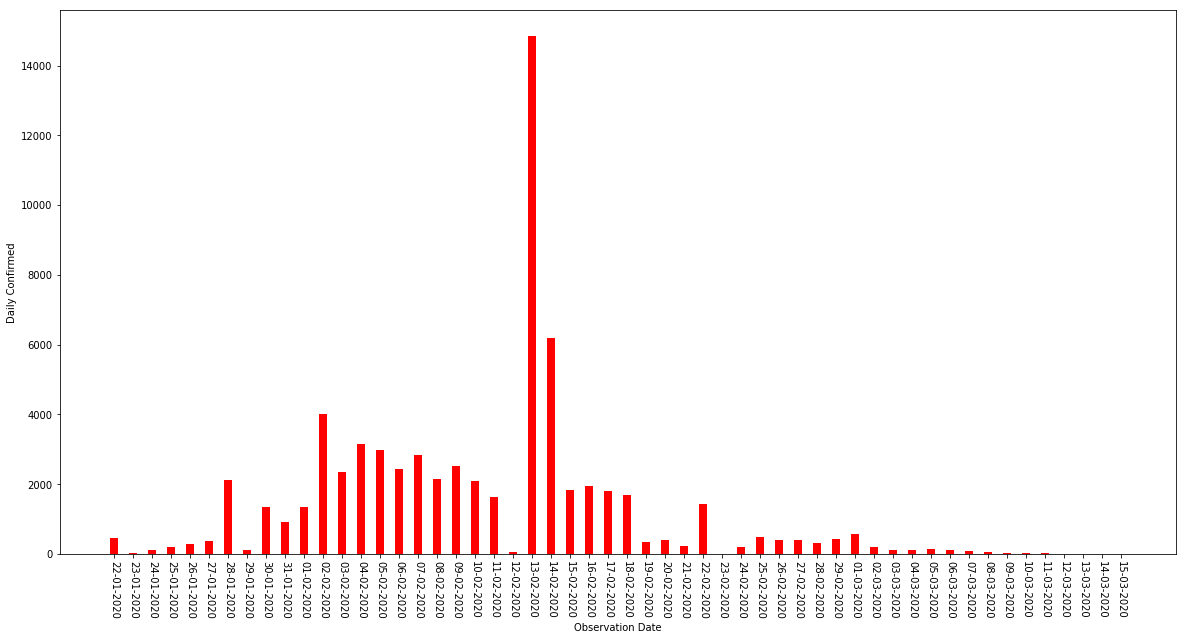

In [12]:
################ Daily Confirmed/Observation date
X=ch['Observation Date']
Y=ch['Daily Confirmed']
plt.figure(figsize=(20,10))
plt.bar(X,Y,0.4,color="red")
plt.xlabel("Observation Date")
plt.ylabel("Daily Confirmed")
plt.xticks(rotation=-90)
plt.show()

In [13]:
##Data quilty
#Missing Data Check
print(pd.isna(ch).sum())

Province/State      0
Observation Date    0
Confirmed           0
Daily Confirmed     0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
Country/Region      0
dtype: int64


In [14]:
#Data errors Check
De= ch.duplicated().sum()
print(De)

0


In [15]:
## Data Preparation
##Selcting data
print(ch.corr()['Confirmed'])
ch = ch.drop(["Country/Region","Latitude","Longitude"],axis=1)
print(ch.dtypes)
print(ch.shape)

Confirmed          1.000000
Daily Confirmed    0.337805
Deaths             0.988502
Recovered          0.866112
Latitude          -0.065854
Longitude          0.029776
Name: Confirmed, dtype: float64
Province/State      object
Observation Date    object
Confirmed            int64
Daily Confirmed      int64
Deaths               int64
Recovered            int64
dtype: object
(1666, 6)


In [16]:
#Missing data check
print(pd.isna(ch).sum())
print(ch.describe().T)

Province/State      0
Observation Date    0
Confirmed           0
Daily Confirmed     0
Deaths              0
Recovered           0
dtype: int64
                  count         mean          std  min   25%    50%     75%  \
Confirmed        1666.0  1727.249700  9027.951448  0.0  75.0  168.0  529.75   
Daily Confirmed  1666.0    48.528211   461.389964  0.0   0.0    1.0   10.00   
Deaths           1666.0    56.030012   358.988208  0.0   0.0    1.0    3.00   
Recovered        1666.0   732.676471  4498.591558  0.0   4.0   71.0  259.50   

                     max  
Confirmed        67794.0  
Daily Confirmed  14840.0  
Deaths            3085.0  
Recovered        54288.0  


In [17]:
#Checking data errors
for col in['Confirmed','Daily Confirmed','Deaths','Recovered']:
    print('*' * 50)
    print(col)
    q_75 = ch[col].quantile(q=0.75)
    print('upper quartile:',q_75)
    q_25 = ch[col].quantile(q=0.25)
    print('lower quartile:',q_25)
    d = q_75 - q_25
    print('IQR:',d)
    data_top = q_75 + 3*d
    data_buttom = q_25 - 3*d
    print('DUB:',data_top)
    print('DBB:',data_buttom)
    print('The number of error data:',len(ch[(ch[col]>data_top)|ch[col]<data_buttom]))

**************************************************
Confirmed
upper quartile: 529.75
lower quartile: 75.0
IQR: 454.75
DUB: 1894.0
DBB: -1289.25
The number of error data: 0
**************************************************
Daily Confirmed
upper quartile: 10.0
lower quartile: 0.0
IQR: 10.0
DUB: 40.0
DBB: -30.0
The number of error data: 0
**************************************************
Deaths
upper quartile: 3.0
lower quartile: 0.0
IQR: 3.0
DUB: 12.0
DBB: -9.0
The number of error data: 0
**************************************************
Recovered
upper quartile: 259.5
lower quartile: 4.0
IQR: 255.5
DUB: 1026.0
DBB: -762.5
The number of error data: 0


In [18]:
#Constructing data
ch["Daily Confirmed rate"] =ch["Daily Confirmed"]/ch["Confirmed"]
print(ch["Daily Confirmed rate"])

0       1.000000
1       0.888889
2       0.400000
3       0.615385
4       0.350000
5       0.142857
6       0.339623
7       0.302632
8       0.240000
9       0.156118
10      0.202020
11      0.126471
12      0.166667
13      0.150000
14      0.094340
15      0.103215
16      0.111278
17      0.092769
18      0.059050
19      0.061446
20      0.034884
21      0.032621
22      0.023077
23      0.025696
24      0.016842
25      0.012474
26      0.011305
27      0.009165
28      0.004057
29      0.001013
          ...   
1636    0.006024
1637    0.004284
1638    0.003416
1639    0.000853
1640    0.001704
1641    0.000851
1642    0.023275
1643    0.001660
1644    0.000000
1645    0.000000
1646    0.000000
1647    0.000000
1648    0.000000
1649    0.000000
1650    0.000000
1651    0.000000
1652    0.000829
1653    0.005771
1654    0.000000
1655    0.001646
1656    0.000000
1657    0.000000
1658    0.000000
1659    0.000000
1660    0.000000
1661    0.000000
1662    0.000000
1663    0.0000

In [19]:
#Integrating Data
f1 = pd.read_csv("Dailly Recovered and Deaths.csv")
print(f1.shape)
f2 = [ch,f1]
newly = pd.concat(f2,axis=1)
newly.to_csv("new" + ".csv",index = 0,sep = ',')
CH=pd.read_csv("new.csv")
print(CH.shape)
print(CH.columns)
print(CH.dtypes)

(1666, 2)
(1666, 9)
Index(['Province/State', 'Observation Date', 'Confirmed', 'Daily Confirmed',
       'Deaths', 'Recovered', 'Daily Confirmed rate', 'Daily Death',
       'Daily Recovered'],
      dtype='object')
Province/State           object
Observation Date         object
Confirmed                 int64
Daily Confirmed           int64
Deaths                    int64
Recovered                 int64
Daily Confirmed rate    float64
Daily Death               int64
Daily Recovered           int64
dtype: object


In [20]:
#Formatting data
CH['Observation Date'] =  pd.to_datetime(CH['Observation Date'])
print(CH['Observation Date'])
print(CH.dtypes)

0      2020-01-22
1      2020-01-23
2      2020-01-24
3      2020-01-25
4      2020-01-26
5      2020-01-27
6      2020-01-28
7      2020-01-29
8      2020-01-30
9      2020-01-31
10     2020-01-02
11     2020-02-02
12     2020-03-02
13     2020-04-02
14     2020-05-02
15     2020-06-02
16     2020-07-02
17     2020-08-02
18     2020-09-02
19     2020-10-02
20     2020-11-02
21     2020-12-02
22     2020-02-13
23     2020-02-14
24     2020-02-15
25     2020-02-16
26     2020-02-17
27     2020-02-18
28     2020-02-19
29     2020-02-20
          ...    
1636   2020-02-15
1637   2020-02-16
1638   2020-02-17
1639   2020-02-18
1640   2020-02-19
1641   2020-02-20
1642   2020-02-21
1643   2020-02-22
1644   2020-02-23
1645   2020-02-24
1646   2020-02-25
1647   2020-02-26
1648   2020-02-27
1649   2020-02-28
1650   2020-02-29
1651   2020-01-03
1652   2020-02-03
1653   2020-03-03
1654   2020-04-03
1655   2020-05-03
1656   2020-06-03
1657   2020-07-03
1658   2020-08-03
1659   2020-09-03
1660   202

In [21]:
##Data Transformation
#Reducing data
print(CH.corr()['Confirmed'])
CH = CH.drop(["Daily Confirmed rate"],axis=1)
print(CH.dtypes)

Confirmed               1.000000
Daily Confirmed         0.337805
Deaths                  0.988502
Recovered               0.866112
Daily Confirmed rate   -0.061703
Daily Death             0.663127
Daily Recovered         0.903466
Name: Confirmed, dtype: float64
Province/State              object
Observation Date    datetime64[ns]
Confirmed                    int64
Daily Confirmed              int64
Deaths                       int64
Recovered                    int64
Daily Death                  int64
Daily Recovered              int64
dtype: object


In [22]:
#Projecting data
print(CH)

     Province/State Observation Date  Confirmed  Daily Confirmed  Deaths  \
0             Anhui       2020-01-22          1                1       0   
1             Anhui       2020-01-23          9                8       0   
2             Anhui       2020-01-24         15                6       0   
3             Anhui       2020-01-25         39               24       0   
4             Anhui       2020-01-26         60               21       0   
5             Anhui       2020-01-27         70               10       0   
6             Anhui       2020-01-28        106               36       0   
7             Anhui       2020-01-29        152               46       0   
8             Anhui       2020-01-30        200               48       0   
9             Anhui       2020-01-31        237               37       0   
10            Anhui       2020-01-02        297               60       0   
11            Anhui       2020-02-02        340               43       0   
12          

In [23]:
#Projecting data
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec = VectorAssembler(inputCols=['Confirmed', 'Daily Confirmed', 'Deaths', 'Recovered', 'Daily Death','Daily Recovered'], outputCol='features')
df = spark.read.csv('new.csv', inferSchema=True, header=True)
features_df = vec.transform(df)
features_df.printSchema()


root
 |-- Province/State: string (nullable = true)
 |-- Observation Date: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Daily Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Daily Confirmed rate: double (nullable = true)
 |-- Daily Death: integer (nullable = true)
 |-- Daily Recovered: integer (nullable = true)
 |-- features: vector (nullable = true)



In [24]:
df.show()


+--------------+----------------+---------+---------------+------+---------+--------------------+-----------+---------------+
|Province/State|Observation Date|Confirmed|Daily Confirmed|Deaths|Recovered|Daily Confirmed rate|Daily Death|Daily Recovered|
+--------------+----------------+---------+---------------+------+---------+--------------------+-----------+---------------+
|         Anhui|      22-01-2020|        1|              1|     0|        0|                 1.0|          0|              0|
|         Anhui|      23-01-2020|        9|              8|     0|        0|  0.8888888888888888|          0|              0|
|         Anhui|      24-01-2020|       15|              6|     0|        0|                 0.4|          0|              0|
|         Anhui|      25-01-2020|       39|             24|     0|        0|  0.6153846153846154|          0|              0|
|         Anhui|      26-01-2020|       60|             21|     0|        0|                0.35|          0|         

In [25]:
model_df = features_df.select('features','Confirmed')
model_df.show()

+--------------------+---------+
|            features|Confirmed|
+--------------------+---------+
| (6,[0,1],[1.0,1.0])|        1|
| (6,[0,1],[9.0,8.0])|        9|
|(6,[0,1],[15.0,6.0])|       15|
|(6,[0,1],[39.0,24...|       39|
|(6,[0,1],[60.0,21...|       60|
|(6,[0,1],[70.0,10...|       70|
|(6,[0,1],[106.0,3...|      106|
|[152.0,46.0,0.0,2...|      152|
|[200.0,48.0,0.0,2...|      200|
|[237.0,37.0,0.0,3...|      237|
|[297.0,60.0,0.0,5...|      297|
|[340.0,43.0,0.0,7...|      340|
|[408.0,68.0,0.0,1...|      408|
|[480.0,72.0,0.0,2...|      480|
|[530.0,50.0,0.0,2...|      530|
|[591.0,61.0,0.0,3...|      591|
|[665.0,74.0,0.0,4...|      665|
|[733.0,68.0,0.0,5...|      733|
|[779.0,46.0,1.0,7...|      779|
|[830.0,51.0,3.0,8...|      830|
+--------------------+---------+
only showing top 20 rows



In [27]:
## train&test
train_df, test_df = model_df.randomSplit([0.7, 0.3])
print((train_df.count(),test_df.count()))


(1152, 514)


In [28]:
from pyspark.ml.regression import LinearRegression        
lin_Reg=LinearRegression(labelCol='Confirmed')                            
lr_model=lin_Reg.fit(train_df)

In [29]:
print('{}{}'.format('Equation of the intercept:',lr_model.intercept))                     

print('{}{}'.format('Equation parameter coefficient:',lr_model.coefficients))             

training_predictions=lr_model.evaluate(train_df)                                              

print('{}{}'.format('The error difference squared:',training_predictions.meanSquaredError))

Equation of the intercept:1.6511292593274087e-11
Equation parameter coefficient:[0.9999999999999519,1.8139771131500092e-14,1.4690944345434942e-12,-2.4288755936180992e-14,1.293812228051324e-12,-5.137266543475328e-14]
The error difference squared:8.570932270268226e-22


In [30]:
params = [1, 5, 10, 20, 50, 100]
metrics = [(train_df, test_df, param, 0.01, 0.0, 'l2', False) for param in params]
print(params)
print(metrics)

[1, 5, 10, 20, 50, 100]
[(DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 1, 0.01, 0.0, 'l2', False), (DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 5, 0.01, 0.0, 'l2', False), (DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 10, 0.01, 0.0, 'l2', False), (DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 20, 0.01, 0.0, 'l2', False), (DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 50, 0.01, 0.0, 'l2', False), (DataFrame[features: vector, Confirmed: int], DataFrame[features: vector, Confirmed: int], 100, 0.01, 0.0, 'l2', False)]
